# Evaluierung des Baseline-Modells

Dieses Notebook evaluiert ein einfaches lineares Regressionsmodell als Baseline für die Umsatzvorhersage. Es verwendet die folgenden Metriken:
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R² Score

## Übersicht
1. Bibliotheken importieren
2. Daten laden und vorbereiten
3. Modell trainieren
4. Modell evaluieren
5. Ergebnisse visualisieren

## 1. Bibliotheken importieren

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the DataPreparation directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_prep_path = os.path.join(project_root, '0_DataPreparation')
sys.path.append(data_prep_path)
from data_preparation import DataPreparation

## 2. Daten laden und vorbereiten

In [2]:
# Daten laden und vorbereiten
data_prep = DataPreparation()
data = data_prep.load_data()
train_data, test_data = data_prep.split_data(data)

# Features und Zielwerte vorbereiten
X_train, y_train = data_prep.prepare_data(train_data, is_training=True)
X_test, y_test = data_prep.prepare_data(test_data, is_training=False)

print("Trainingsdaten Shape:", X_train.shape)
print("Testdaten Shape:", X_test.shape)

Trainingsdaten: von 2013-07-01 00:00:00 bis 2017-07-31 00:00:00
Testdaten: von 2017-08-01 00:00:00 bis 2018-07-31 00:00:00
Anzahl Trainingssamples: 7493
Anzahl Testsamples: 1841
Trainingsdaten Shape: (7493, 29)
Testdaten Shape: (1841, 29)


## 3. Modell trainieren

In [3]:
# Modell initialisieren und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen machen
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## 4. Modell evaluieren

In [4]:
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Evaluiert das Modell mit verschiedenen Metriken."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nMetriken für {dataset_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    
    return mse, rmse, mae, r2

# Modell auf Trainings- und Testdaten evaluieren
train_metrics = evaluate_model(y_train, y_pred_train, "Trainingsdaten")
test_metrics = evaluate_model(y_test, y_pred_test, "Testdaten")


Metriken für Trainingsdaten:
MSE: 5675.27
RMSE: 75.33
MAE: 50.18
R²: 0.7401

Metriken für Testdaten:
MSE: 5038.79
RMSE: 70.98
MAE: 51.04
R²: 0.7022


## 5. Ergebnisse visualisieren

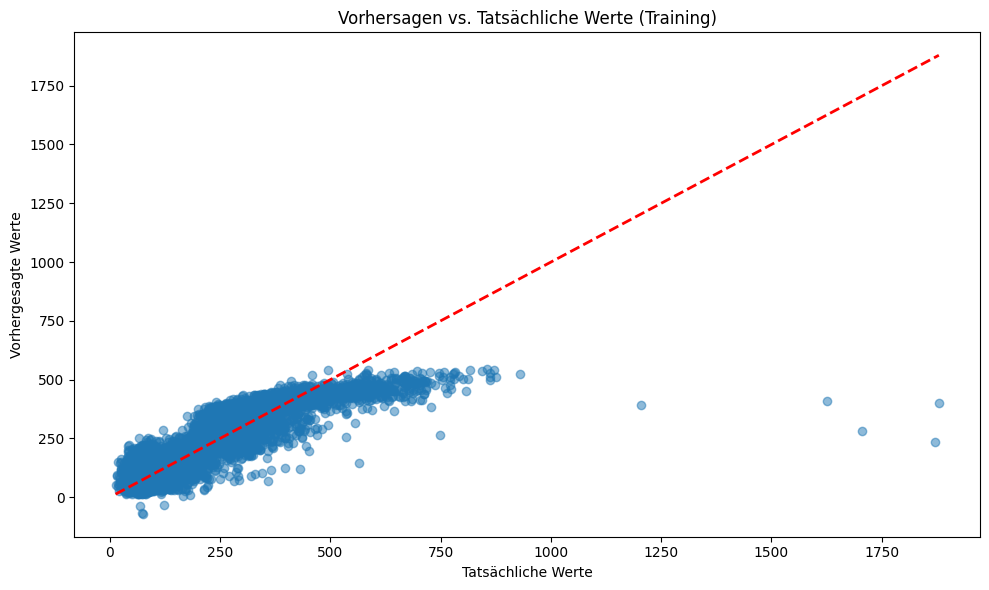

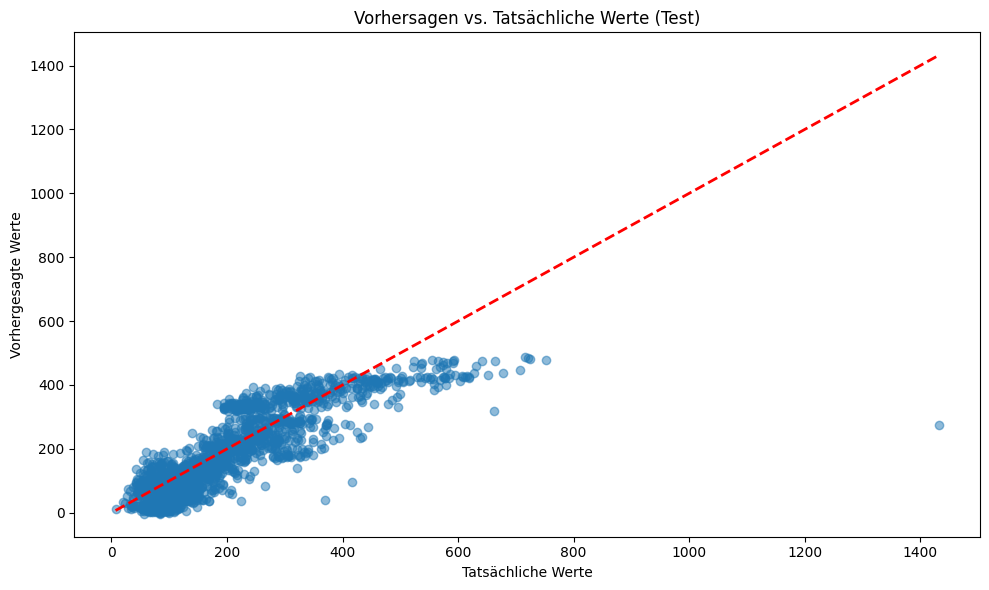

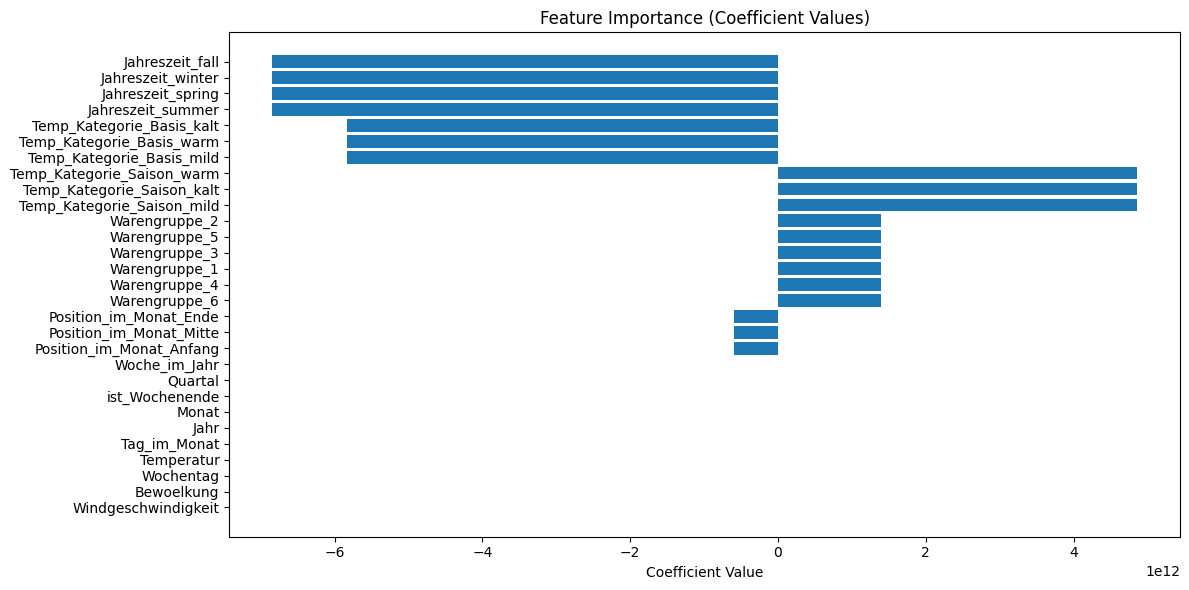

In [5]:
def plot_predictions(y_true, y_pred, title):
    """Plottet die vorhergesagten vs. tatsächlichen Werte."""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Tatsächliche Werte')
    plt.ylabel('Vorhergesagte Werte')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Visualisierung für Trainings- und Testdaten
plot_predictions(y_train, y_pred_train, 'Vorhersagen vs. Tatsächliche Werte (Training)')
plot_predictions(y_test, y_pred_test, 'Vorhersagen vs. Tatsächliche Werte (Test)')

# Feature Importance Plot
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)

plt.barh(range(len(feature_importance)), feature_importance['Coefficient'])
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficient Values)')
plt.tight_layout()
plt.show()